###**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [2]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs-vs-cats/train/cats'
dog_directory_path = '/content/dogs-vs-cats/train/dogs'

In [3]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

class_names = ['Cat', 'Dog']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


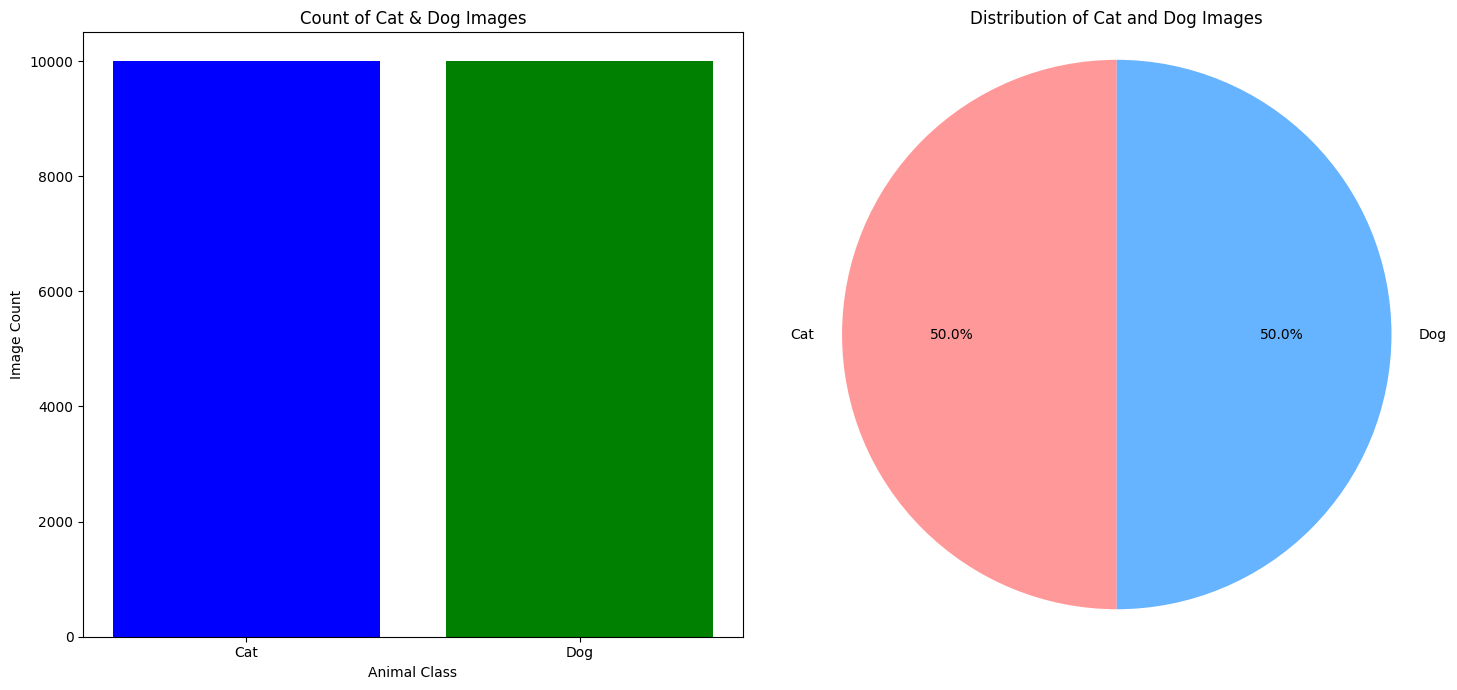

In [4]:
# Creating both a bar chart and a pie chart side by side in a single figure
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

# Bar chart on the first subplot
ax[0].bar(class_names, count, color = ['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat & Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels = class_names, colors = colors, autopct = '%1.1f%%', startangle = 90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

In [5]:
# Loading Shapes and Channels
def image_to_array(image_path):
    """
    Read an image and convert it to a numpy array.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
    """
    try:
      with Image.open(image_path) as img:
        image_array = np.array(img)
        return image_array
    except IOError:
      print(f'Could not read image file at {image_path}.')
      return None

array([[[238, 224, 211],
        [169, 153, 137],
        [139, 116,  98],
        ...,
        [133, 102,  82],
        [128,  97,  77],
        [127,  96,  76]],

       [[250, 234, 219],
        [173, 154, 137],
        [133, 108,  86],
        ...,
        [115,  84,  64],
        [111,  80,  59],
        [110,  79,  59]],

       [[248, 230, 210],
        [170, 148, 127],
        [129, 101,  77],
        ...,
        [ 85,  54,  33],
        [ 83,  53,  29],
        [ 84,  53,  32]],

       ...,

       [[255, 255, 244],
        [254, 255, 241],
        [252, 250, 237],
        ...,
        [239, 240, 224],
        [238, 239, 223],
        [238, 239, 223]],

       [[255, 255, 244],
        [255, 255, 242],
        [252, 253, 239],
        ...,
        [245, 246, 232],
        [244, 245, 231],
        [244, 245, 231]],

       [[255, 255, 244],
        [255, 255, 243],
        [254, 255, 241],
        ...,
        [250, 251, 237],
        [248, 249, 235],
        [249, 250, 236]]], dtype=uint8)
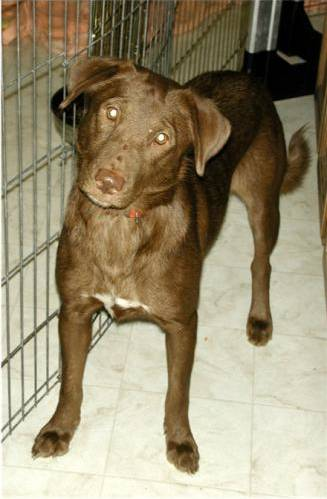

In [6]:
image_to_array('/content/dogs-vs-cats/train/dogs/dog.1.jpg')

###**Building Model**

In [7]:
# Set path to the dataset
base_dir = '/content/dogs-vs-cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [8]:
# Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'training'
)

validation_genertor = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'validation',
    shuffle = False
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [9]:
# Getting Class Labels

# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print(f'Training Class Labels: {train_class_labels}')

# Accessing class labels for the validation data
validation_class_labels = validation_genertor.class_indices
print(f'Validation Class Labels: {validation_class_labels}')

Training Class Labels: {'cats': 0, 'dogs': 1}
Validation Class Labels: {'cats': 0, 'dogs': 1}


In [10]:
# Getting batch of images
images, labels = next(train_generator)
images.shape, labels.shape

((20, 150, 150, 3), (20,))

In [11]:
# Function to plot images and their labels
def plot_images_from_generator(generator, num_images = 4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize = (20, 20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
      ax.imshow(img)
      # Inverse the class indices dictionary to get class names from labels
      class_labels = dict((v,k) for k, v in generator.class_indices.items())
      ax.set_title(class_labels[int(label)])
      ax.axis('off')
    plt.tight_layout()
    plt.show()

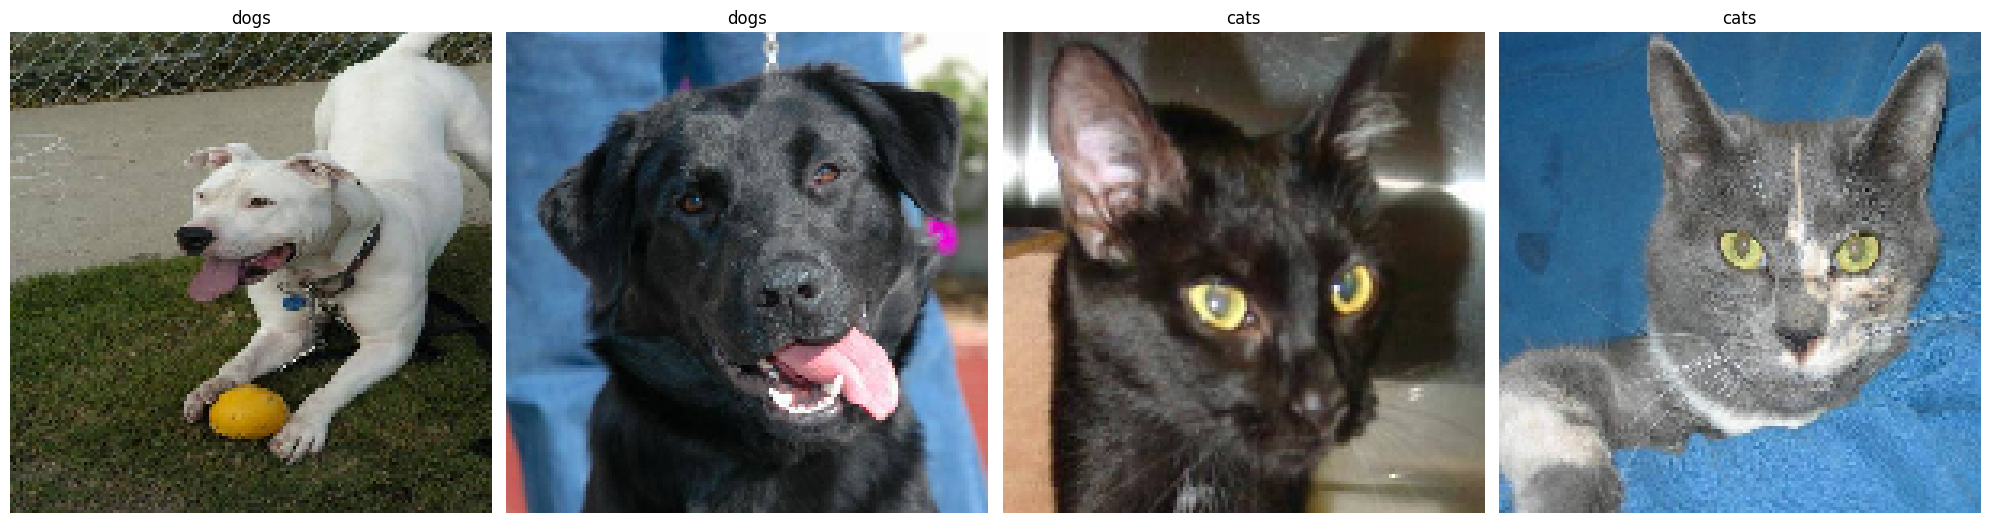

In [12]:
plot_images_from_generator(train_generator, num_images = 4)

###**Model Building**

In [13]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,735,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,755,393 (18.14 MB)

 Trainable params: 4,755,393 (18.14 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_generator, epochs = 10, validation_data = validation_genertor)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.6076 - loss: 0.6629 - val_accuracy: 0.7315 - val_loss: 0.5328
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 89s 60ms/step - accuracy: 0.7484 - loss: 0.5085 - val_accuracy: 0.7918 - val_loss: 0.4649
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 48s 59ms/step - accuracy: 0.8113 - loss: 0.4092 - val_accuracy: 0.7922 - val_loss: 0.4423
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.8783 - loss: 0.2931 - val_accuracy: 0.7912 - val_loss: 0.5006
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9323 - loss: 0.1730 - val_accuracy: 0.8075 - val_loss: 0.5954
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.9767 - loss: 0.0706 - val_accuracy: 0.8025 - val_loss: 0.7343
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9911 - loss: 0.0319 - val_accuracy: 0.7970 - val_loss: 0.8793
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9908 - loss: 0.0303 - val_accurac

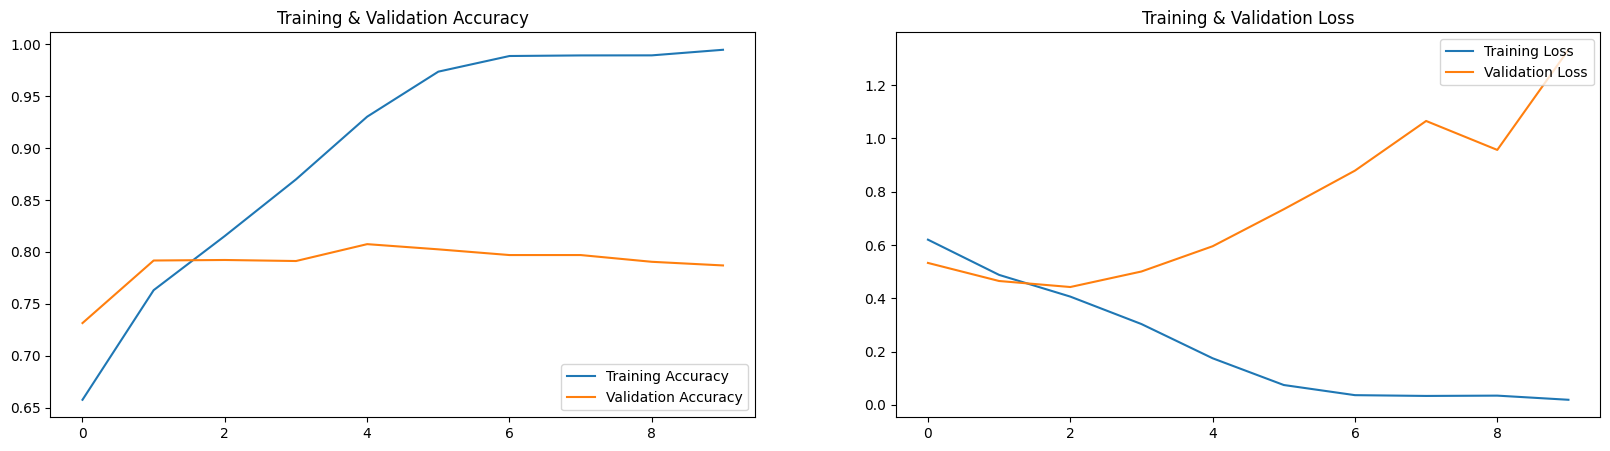

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label = 'Training Accuracy')
plt.plot(epoch_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label = 'Training Loss')
plt.plot(epoch_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')
plt.show()

###**Model Evaluation**

In [19]:
# Define the test data generator
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = '/content/dogs-vs-cats/test'

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = False
)

Found 5000 images belonging to 2 classes.


In [20]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(test_generator, steps = len(test_generator))

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

  5/250 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8063 - loss: 0.8537

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7545 - loss: 1.5737
Test Loss: 1.2692101001739502
Test Accuracy: 0.7950000166893005


###**Making test predictions**

In [21]:
np.ceil(test_generator.samples / test_generator.batch_size)

250.0

In [22]:
probabilities = model.predict(test_generator)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


array([[1.7274167e-06],
       [6.7888492e-01],
       [1.7995008e-04],
       ...,
       [3.5438663e-01],
       [9.9716085e-01],
       [9.9140680e-01]], dtype=float32)

In [29]:
# Predict probabilities for the positive class
probabilities = model.predict(test_generator, steps = int(test_generator.samples / test_generator.batch_size))

# The output is the probability of the positive class (assuming binary classification),
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()

# To match with the filenames or other identifiers, you can extract the file names from the generator
filenames = test_generator.filenames

# If you need the actual class labels instead of 0/1, you can map the predicted classes back to the original labels
class_labels = list(test_generator.class_indices.keys())
predicted_labels = [class_labels[i] for i in predicted_classes]

# Inspect the results:
for i in range(len(filenames)):
  print(f"File: {filenames[i]} - Predicted: {predicted_labels[i]}")

Streaming output truncated to the last 5000 lines.
File: cats/cat.10.jpg - Predicted: cats
File: cats/cat.10000.jpg - Predicted: dogs
File: cats/cat.10001.jpg - Predicted: cats
File: cats/cat.10007.jpg - Predicted: cats
File: cats/cat.10017.jpg - Predicted: cats
File: cats/cat.10021.jpg - Predicted: cats
File: cats/cat.10026.jpg - Predicted: cats
File: cats/cat.10030.jpg - Predicted: cats
File: cats/cat.10033.jpg - Predicted: cats
File: cats/cat.10035.jpg - Predicted: cats
File: cats/cat.10036.jpg - Predicted: cats
File: cats/cat.10046.jpg - Predicted: cats
File: cats/cat.10048.jpg - Predicted: cats
File: cats/cat.10052.jpg - Predicted: cats
File: cats/cat.10057.jpg - Predicted: cats
File: cats/cat.10064.jpg - Predicted: dogs
File: cats/cat.10074.jpg - Predicted: cats
File: cats/cat.10086.jpg - Predicted: cats
File: cats/cat.10091.jpg - Predicted: cats
File: cats/cat.10105.jpg - Predicted: cats
File: cats/cat.10109.jpg - Predicted: cats
File: cats/cat.10110.jpg - Predicted: dogs
File: 

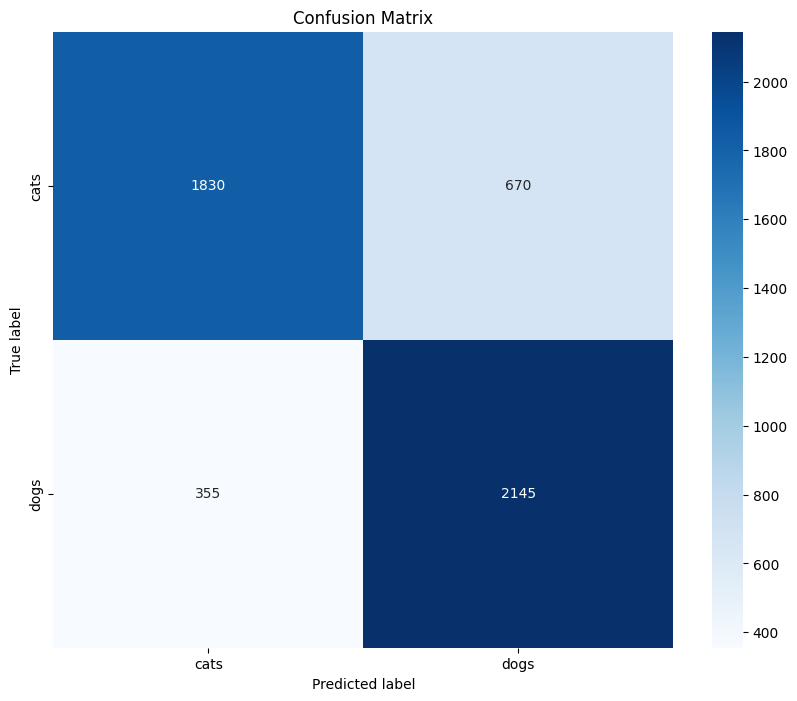

In [33]:
# Get the true labels from the test generator
true_classes = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)

# Print the results
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7545 - loss: 1.5737
Test Accuracy: 0.7950000166893005
Test Loss: 1.2692101001739502


###**Single Image Prediction**

In [40]:
def make_prediction(image_path):
  img = load_img(image_path, target_size = (150, 150))
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  print(f"Prediction: {prediction}")

  # Original image
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title("Original Image")
  plt.axis("off")

  # Prediction
  plt.subplot(1, 2, 2)
  if prediction[0][0] > 0.5:
    plt.title("Predicted: Dog")
  else:
    plt.title("Predicted: Cat")
  plt.imshow(img)
  plt.axis('off')

  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
Prediction: [[0.99999964]]


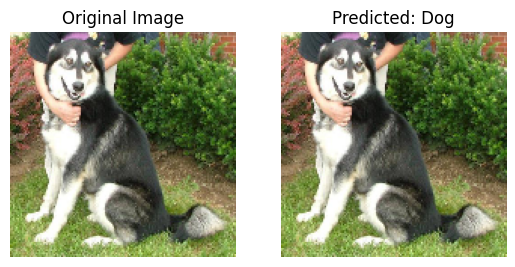

In [41]:
image_path = "/content/dogs-vs-cats/test/dogs/dog.10021.jpg"
make_prediction(image_path)

###**Misclassification**

In [43]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose = 1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassification_indices = np.where(predicted_classes != true_classes)[0]
misclassification_count = len(misclassification_indices)
print(f"Total misclassifications in the test set: {misclassification_count} out of {len(true_classes)}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step
Total misclassifications in the test set: 1025 out of 5000


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
Total misclassifications: 1025


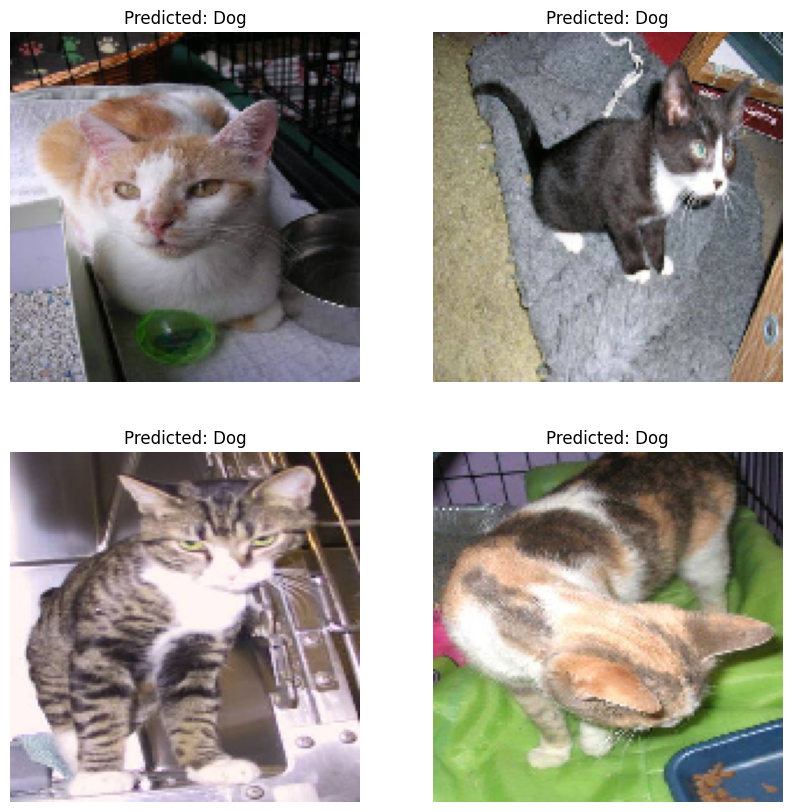

In [47]:
# Generate predictions for all test images
predictions = model.predict(test_generator)

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames

# Identifying indices of misclassified images
misclassification_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassification_indices)}")

# Select a random subset of misclassified images
num_samples = 4
random_indices = np.random.choice(list(misclassification_indices), size = num_samples)

# Plot
plt.figure(figsize = (10, 10))
for i, idx in enumerate(random_indices, 1):
  # Load Image
  img_path = test_dir + '/' + filenames[idx]
  img = load_img(img_path, target_size = (150, 150))

  # Predicted Class
  predicted_class = "Dog" if predicted_classes[idx] else "Cat"

  # Display
  plt.subplot(2, 2, i)
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class}")
  plt.axis('off')
plt.show()

###**Visualising the kernel feature maps.**

In [48]:
# Get all the layers in which conv is present.

for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 32)
layer number 4 conv2d_2 (3, 3, 32, 32)


In [49]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [50]:
filters.shape, bias.shape

((3, 3, 32, 32), (32,))

In [51]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

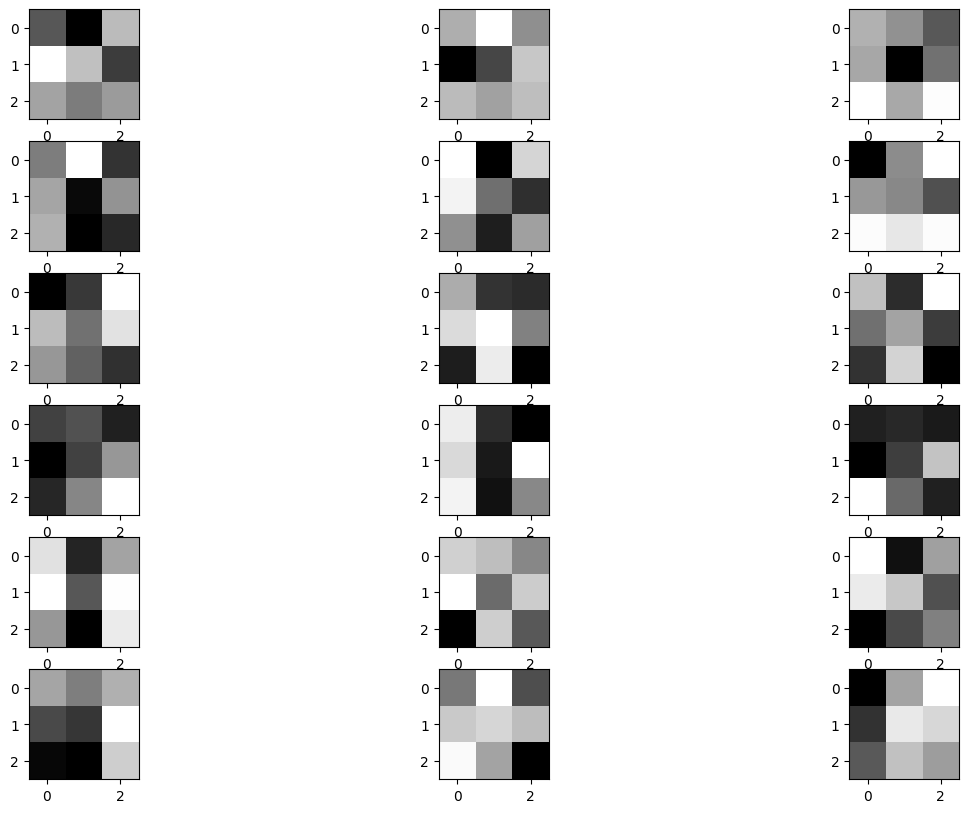

In [52]:
n_filters=6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


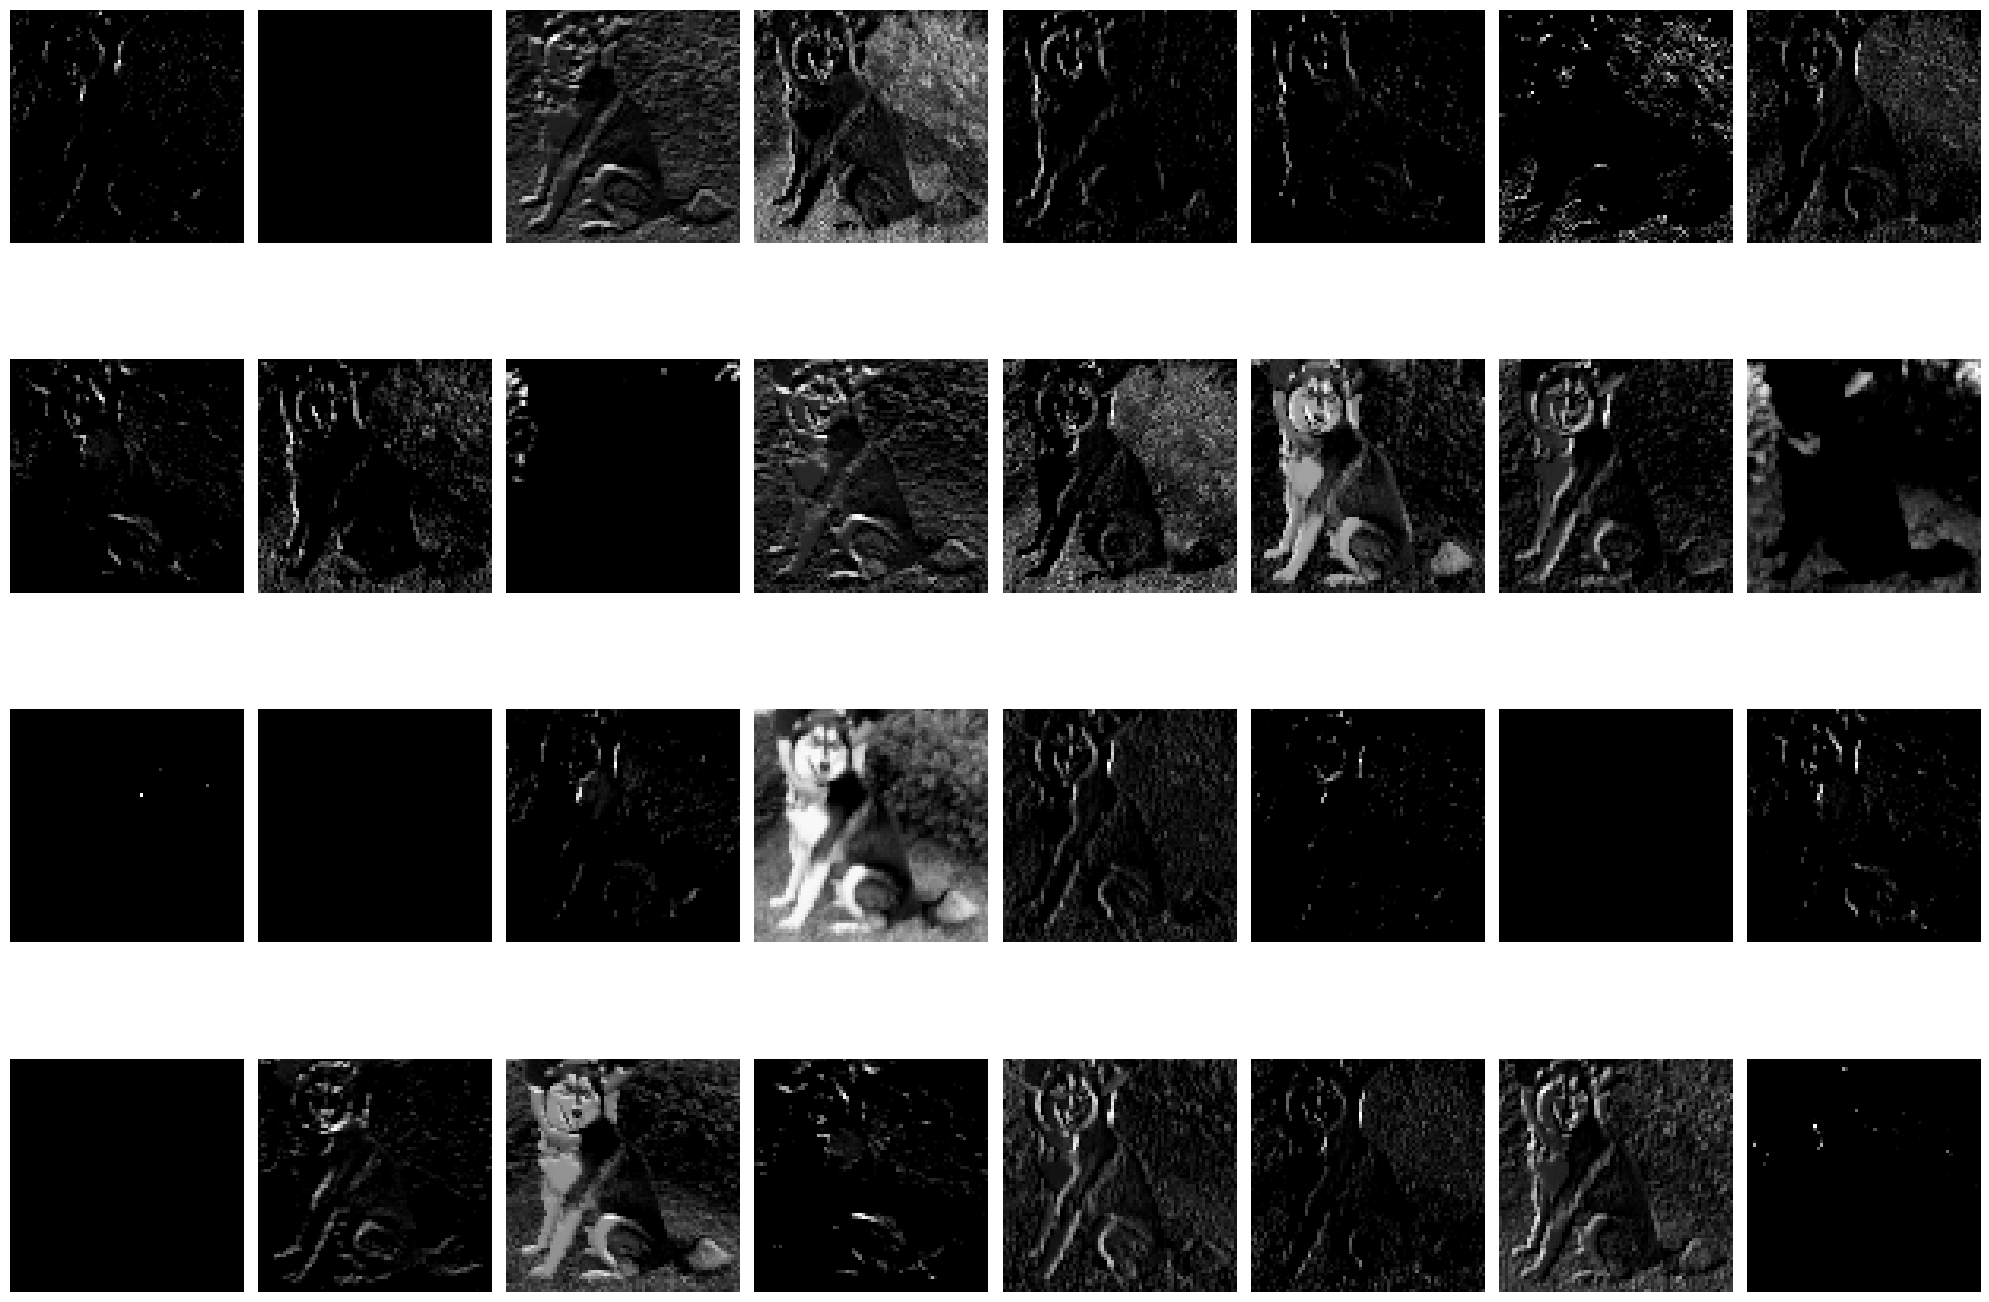

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs-vs-cats/test/dogs/dog.10021.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()